In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## data preprocessing


### training image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory("C:/Users/darsh/Desktop/plant disease copy/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory("C:/Users/darsh/Desktop/plant disease copy/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[143.75 141.75 146.75]
   [144.5  142.5  147.5 ]
   [149.25 147.25 152.25]
   ...
   [143.5  138.5  142.5 ]
   [146.25 141.25 145.25]
   [143.75 138.75 142.75]]

  [[137.75 135.75 140.75]
   [134.25 132.25 137.25]
   [138.25 136.25 141.25]
   ...
   [140.25 135.25 139.25]
   [141.75 136.75 140.75]
   [142.75 137.75 141.75]]

  [[144.75 142.75 147.75]
   [147.75 145.75 150.75]
   [145.75 143.75 148.75]
   ...
   [138.75 133.75 137.75]
   [140.25 135.25 139.25]
   [137.25 132.25 136.25]]

  ...

  [[ 71.25  70.25  75.25]
   [ 66.    65.    70.  ]
   [ 66.25  65.25  70.25]
   ...
   [ 88.75  87.75  92.75]
   [ 87.75  86.75  91.75]
   [ 86.75  85.75  90.75]]

  [[ 67.5   66.5   71.5 ]
   [ 65.25  64.25  69.25]
   [ 67.    66.    71.  ]
   ...
   [ 84.75  83.75  88.75]
   [ 87.    86.    91.  ]
   [ 86.    85.    90.  ]]

  [[ 66.    65.    70.  ]
   [ 66.75  65.75  70.75]
   [ 66.25  65.25  70.25]
   ...
   [ 88.    87.    92.  ]
   [ 83.75  82.75  87.75]
   [ 82.5   81.5   8

## to avoid overshooting
 1 choose small learning rate default 0.001 we are taking 0.0001
 2 there may be chance of underfitting so increase number of neuron

## building model

In [11]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\darsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#output layer
model.add(Dense(units=38,activation='softmax'))

### compiling model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',  metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1982s 900ms/step - accuracy: 0.3919 - loss: 2.1696 - val_accuracy: 0.8345 - val_loss: 0.5244
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1954s 889ms/step - accuracy: 0.8395 - loss: 0.5182 - val_accuracy: 0.9011 - val_loss: 0.3079
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1982s 902ms/step - accuracy: 0.9039 - loss: 0.3008 - val_accuracy: 0.9287 - val_loss: 0.2166
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2635s 1s/step - accuracy: 0.9332 - loss: 0.2078 - val_accuracy: 0.9360 - val_loss: 0.1923
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2210s 1s/step - accuracy: 0.9533 - loss: 0.1431 - val_accuracy: 0.9378 - val_loss: 0.1934
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2134s 971ms/step - accuracy: 0.9636 - loss: 0.1162 - val_accuracy: 0.9467 - val_loss: 0.1706
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2097s 954ms/step - accuracy: 0.9668 - loss: 0.0991 - val_accuracy: 0.9294 - val_loss: 0.2281
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2051s 934ms/step - 

model evaluation

In [49]:
#model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 502s 228ms/step - accuracy: 0.9884 - loss: 0.0363


In [51]:
print(train_loss,train_acc)

0.03379000350832939 0.989387571811676


In [53]:
#model evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 116s 211ms/step - accuracy: 0.9607 - loss: 0.1280


In [55]:
print(val_loss,val_acc)

0.12215949594974518 0.9625540375709534


## saving the model

In [60]:
model.save("trained_model.keras")

In [62]:
training_history.history

{'accuracy': [0.5938402414321899,
  0.8596486449241638,
  0.9133651256561279,
  0.9383313059806824,
  0.9547194242477417,
  0.965232253074646,
  0.969499945640564,
  0.9755174517631531,
  0.9784764051437378,
  0.9817056655883789],
 'loss': [1.3798539638519287,
  0.4453117847442627,
  0.26934000849723816,
  0.19045467674732208,
  0.14067421853542328,
  0.10900558531284332,
  0.09294645488262177,
  0.07547672092914581,
  0.06718923896551132,
  0.05684615671634674],
 'val_accuracy': [0.8345094323158264,
  0.901149570941925,
  0.9286933541297913,
  0.9359776973724365,
  0.937798798084259,
  0.9467334151268005,
  0.9294331669807434,
  0.9545299410820007,
  0.9656840562820435,
  0.9625540375709534],
 'val_loss': [0.5243685841560364,
  0.3079119920730591,
  0.21664391458034515,
  0.19232487678527832,
  0.19342292845249176,
  0.17059503495693207,
  0.2281142920255661,
  0.1470896452665329,
  0.11183776706457138,
  0.12215946614742279]}

In [64]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## accuracy visualization

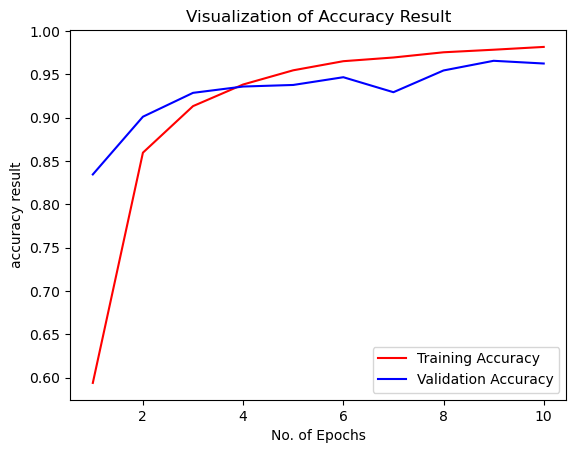

In [67]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('accuracy result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## some other matrics for model evaluation

In [70]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [72]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/darsh/Desktop/plant disease copy/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [74]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 351s 20ms/step


(array([[9.99992013e-01, 5.65208779e-07, 5.84599880e-09, ...,
         1.65911274e-14, 1.94298770e-14, 4.03657251e-13],
        [9.99999166e-01, 4.92508093e-07, 7.08807624e-10, ...,
         2.90833289e-16, 1.09134791e-14, 7.71506204e-14],
        [9.99999642e-01, 7.74895970e-09, 1.32119311e-08, ...,
         1.07418685e-14, 1.36135005e-12, 2.96781939e-11],
        ...,
        [2.68550828e-12, 2.32837859e-15, 4.92000919e-11, ...,
         4.23004123e-12, 1.44037169e-12, 9.99999046e-01],
        [8.78418727e-10, 2.32914794e-12, 1.63399028e-09, ...,
         2.77152834e-09, 6.27320418e-10, 9.99996066e-01],
        [6.31803569e-14, 6.18641630e-16, 3.61524802e-13, ...,
         4.66926953e-13, 4.83994012e-10, 9.99991655e-01]], dtype=float32),
 (17572, 38))

In [76]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [78]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [80]:
true_categories = tf.concat([y for x, y in test_set], axis=0)

In [82]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [84]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm

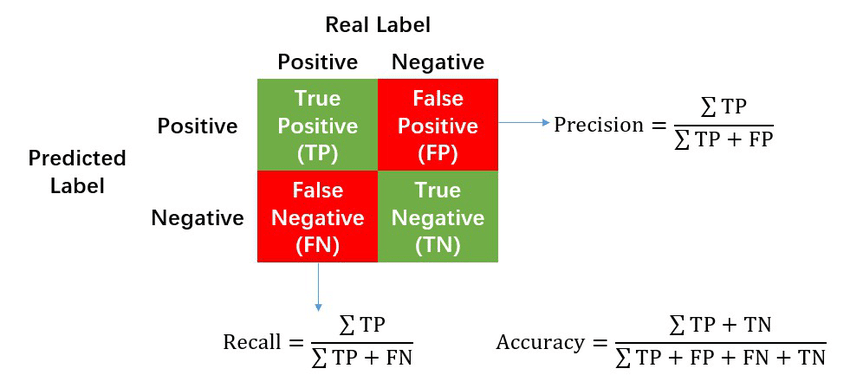

In [89]:
from sklearn.metrics import confusion_matrix,classification_report

In [91]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.94       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.96      0.96       440
                                   Apple___healthy       0.94      0.95      0.95       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.96      0.92       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.90      0.

In [95]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[460,   6,   0, ...,   0,   0,   0],
       [  0, 490,   0, ...,   0,   0,   0],
       [  1,   0, 421, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 475]], dtype=int64)

## Confusion matrics visualization

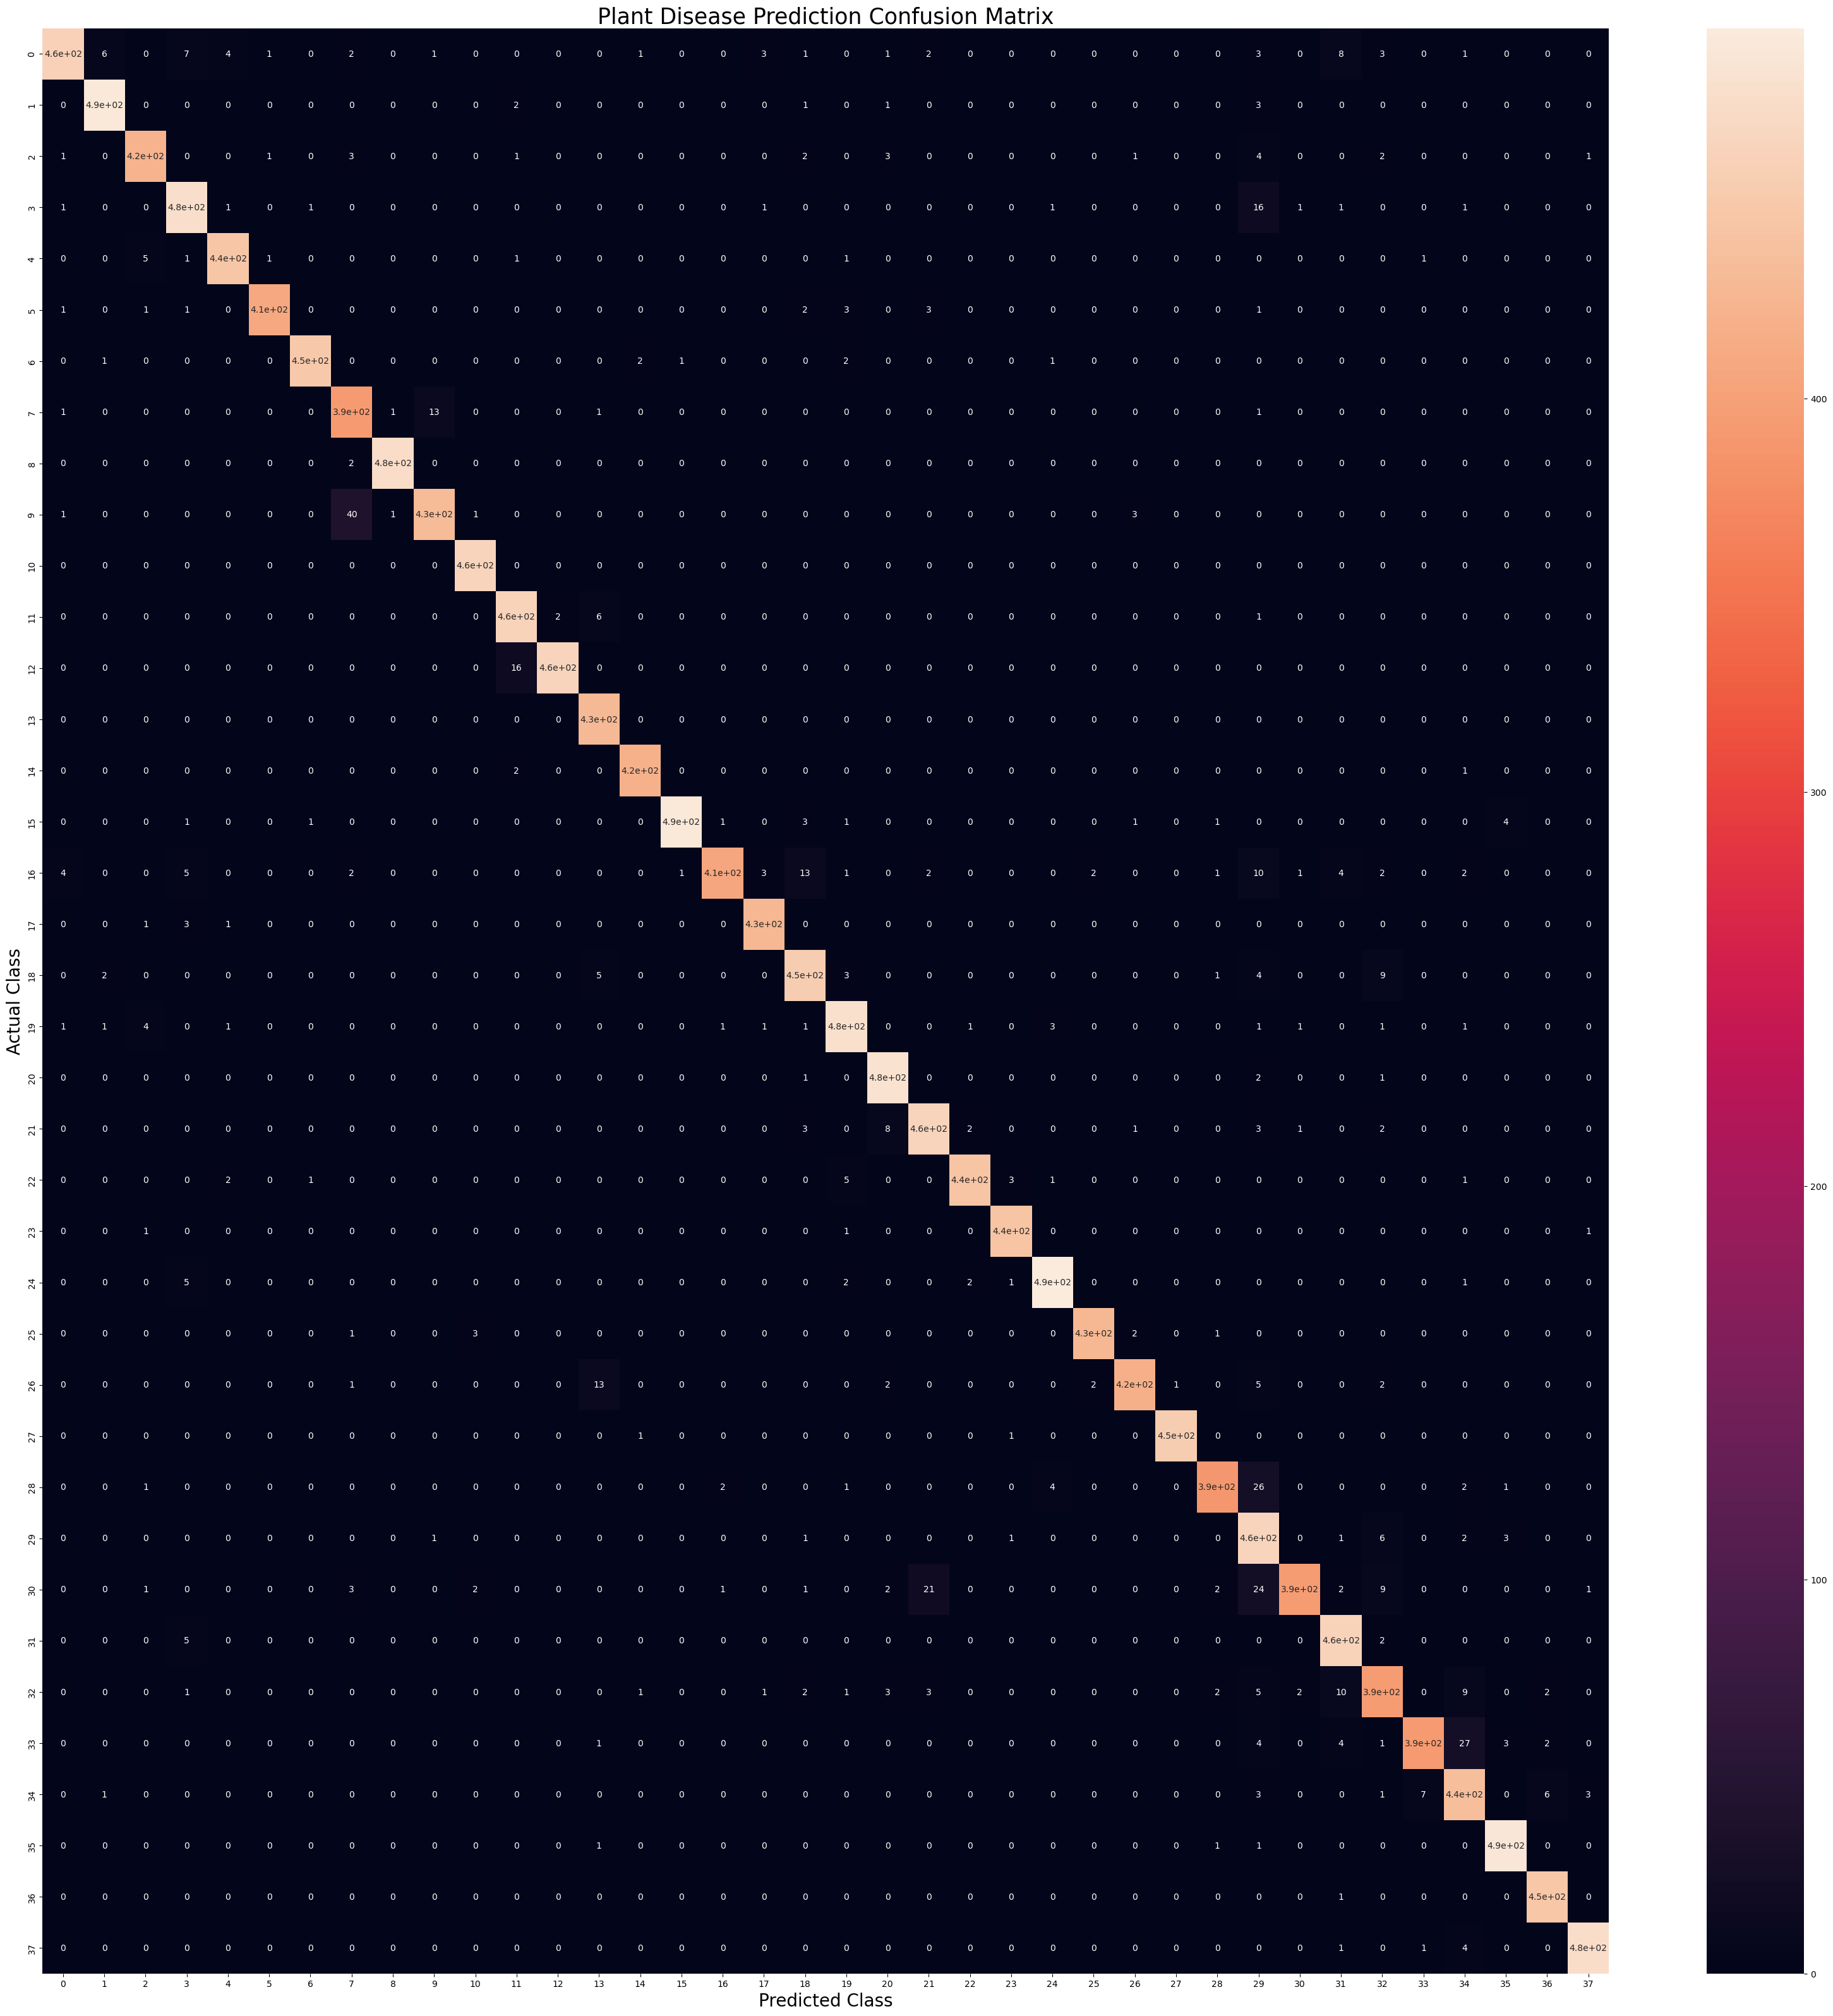

In [98]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()